## Debug exercise

The functions below is used for creating the next downspampled layer of the scale pyramid. It does not crash, however is not fully correct.
First, create a test example to find the problem. Second, find the source of the problem. Finally, fix it.

In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 891.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 16.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 823.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 654.6 kB/s eta 0:00:0000:010:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import kornia
import matplotlib.pyplot as plt

def _get_pyramid_gaussian_kernel() -> torch.Tensor:
    """Utility function that return a pre-computed gaussian kernel."""
    return torch.tensor([[
        [1., 4., 6., 4., 1.],
        [4., 16., 24., 16., 4.],
        [6., 24., 36., 24., 6.],
        [4., 16., 24., 16., 4.],
        [1., 4., 6., 4., 1.]
    ]]) / 256.


class PyrDown(nn.Module):
    r"""Blurs a tensor and downsamples it.
    Args:
        border_type (str): the padding mode to be applied before convolving.
          The expected modes are: ``'constant'``, ``'reflect'``,
          ``'replicate'`` or ``'circular'``. Default: ``'reflect'``.
    Return:
        torch.Tensor: the downsampled tensor.
    Shape:
        - Input: :math:`(B, C, H, W)`
        - Output: :math:`(B, C, H / 2, W / 2)`
    Examples:
        >>> input = torch.rand(1, 2, 4, 4)
        >>> output = kornia.transform.PyrDown()(input)  # 1x2x2x2
    """

    def __init__(self, border_type: str = 'reflect') -> None:
        super(PyrDown, self).__init__()
        self.border_type: str = border_type
        self.kernel: torch.Tensor = _get_pyramid_gaussian_kernel()

    def forward(self, input: torch.Tensor) -> torch.Tensor:  # type: ignore
        if not torch.is_tensor(input):
            raise TypeError("Input type is not a torch.Tensor. Got {}"
                            .format(type(input)))
        if not len(input.shape) == 4:
            raise ValueError("Invalid input shape, we expect BxCxHxW. Got: {}"
                             .format(input.shape))
        # blur image
        x_blur: torch.Tensor = kornia.filters.filter2d(
            input, self.kernel, self.border_type)

        # reject even rows and columns.
        out: torch.Tensor =  x_blur[..., ::2, ::2]
        return out



def pyrdown(
        input: torch.Tensor,
        border_type: str = 'reflect') -> torch.Tensor:
    r"""Blurs a tensor and downsamples it.
    See :class:`~kornia.transform.PyrDown` for details.
    """
    
    return PyrDown(border_type)(input)



ModuleNotFoundError: No module named 'torch'

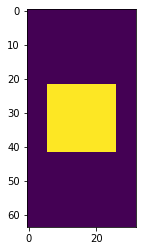

In [14]:
timg = torch.zeros(1,1,64,32)
timg[0,0,32-10:32+10,16-10:16+10] = 1.0
img = kornia.tensor_to_image(timg)

# use the interpolation (not nearest neighbors) for blurr


plt.imshow(kornia.tensor_to_image(timg))